In [2]:
import keras
def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [3]:
from keras.models import load_model

model = load_model('/home/ai_car/Preprocessing-MedicalImage/model/unet.h5', custom_objects={'dice_coef':dice_coef,
                                                                                            'dice_coef_loss': dice_coef_loss})
model.summary()

2022-12-10 12:44:37.048267: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-10 12:44:37.057135: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-12-10 12:44:37.057157: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1835] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-12-10 12:44:37.057716: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 512, 512, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 256, 256, 32) 0           conv2d_2[0][0]                   
____________________________________________________________________________________________

In [4]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/home/ai_car/Preprocessing-MedicalImage/image/00003331_000.png')
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
# visualize the binary image
# cv2.cvShowImage('Binary image', thresh)


In [5]:
from PIL import Image
import numpy as np
import cv2
image = cv2.imread('/home/ai_car/Preprocessing-MedicalImage/image/00003349_000.png')
image.resize((512,512))
image = image.reshape(image.shape[0], image.shape[1], 1)

In [10]:
image = Image.open('/home/ai_car/Preprocessing-MedicalImage/image/00003349_000.png')
image = image.resize((512, 512))
image = np.asarray(image)
image = image.reshape(image.shape[0], image.shape[1], 1)

In [15]:
original = image.copy()
mask = model.predict(np.expand_dims(image, axis=0))
# segmented = np.squeeze(original).copy()
# segmented[np.squeeze(mask)<0.2] = 0

In [16]:
plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
plt.xlabel("Mask")

NameError: name 'validation_seg' is not defined

In [17]:
cv2.imshow('',segmented)

: 

: 

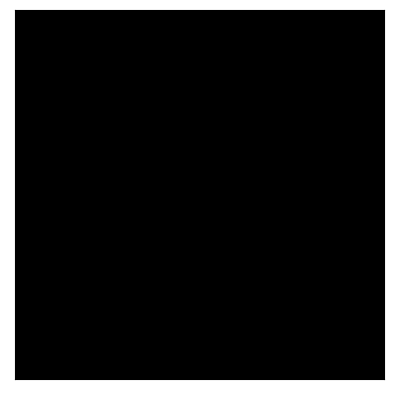

In [16]:
plt.imshow(segmented, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

(-0.5, 127.5, 127.5, -0.5)

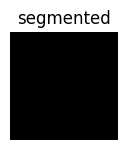

In [24]:
import matplotlib.pyplot as plt
plt.subplot(1,4,2)
plt.imshow(segmented,cmap="gray")
plt.title("segmented")
plt.axis("off")


(-0.5, 1023.5, 1023.5, -0.5)

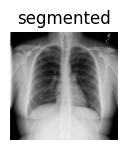

In [7]:
image = cv2.imread('/home/ai_car/Preprocessing-MedicalImage/image/00003349_000.png')
contours, hierarchy = cv2.findContours(image=segmented, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                      
# draw contours on the original image
image_copy = image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
plt.subplot(1,4,2)
plt.imshow(image_copy,cmap="gray")
plt.title("segmented")
plt.axis("off")

(-0.5, 127.5, 127.5, -0.5)

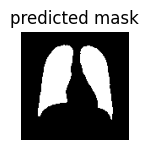

In [11]:
plt.subplot(1,4,3)
plt.imshow(np.squeeze(mask[0]),cmap="gray")
plt.title("predicted mask")
plt.axis("off")

In [12]:
segmented

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
from rembg import remove
from PIL import Image

input_path = 'input.png'
output_path = 'output.png'

input = Image.open(input_path)
output = remove(input)
output.save(output_path)